In [14]:

# 1. Introduction
# 2. Data preparation
# 2.1 Import necessary libraries
# 2.2 Load data
# 2.3 Check for null and missing values
# 2.4 Normalization Reshape
# 2.5 Label encoding
# 2.6 Split training and valdiation set
# 3. CNN 
# 3.1 GridSearch 
# 3.2 Define the model
# 3.3 Set the optimizer and Compile
# 4. Evaluate the model
# 4.1 Training and validation graph
# 4.2 Example Prediction
# 5. Prediction and submition
# 5.1 Predict and Submit results



In [15]:
#
# 1. Introduction
#

# In this project, i aim to develop a Convolutional Neural Network (CNN)
# model using the MNIST dataset for handwritten digit recognition.
# Here are the main steps:

# -Start by importing the required libraries for the project.
# -Load the MNIST dataset and explore its dimensions and sample images.
# -Preprocess the data, including reshaping and normalization.
# -Construct a CNN model using the Keras library.
# -Train the CNN model using the prepared dataset.
# -After training, evaluate the model's performance and visualize the results.
# -Finally, generate a submission file in the required format for the Kaggle competition.

In [16]:
#
# 2.1 Import necessary libraries
#

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from scikeras.wrappers import KerasClassifier
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,BatchNormalization
import random

In [17]:
#
# 2.2 Load data
#

train_data = pd.read_csv('train.csv') 
test_data = pd.read_csv('test.csv')

X = train_data.drop('label',axis=1)
y = train_data['label']

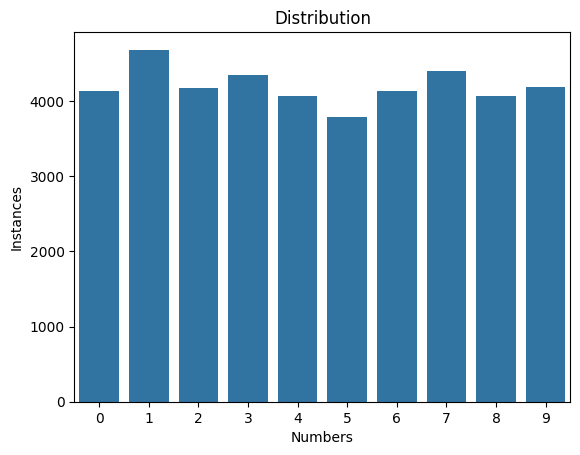

In [18]:
### Distribution of Numbers
list_of_value = y.value_counts()
sns.barplot(list_of_value)
plt.title('Distribution')
plt.xlabel('Numbers')
plt.ylabel('Instances')
plt.show()

In [19]:
#
# 2.3 Check for null and missing values
#

print(f" Train Set Shape Row and Colums : {train_data.shape}\n",
      f"Test Set Shape Row and Colums : {test_data.shape}\n",
      f"Train Set Nan Value : {train_data.isna().sum().sum()}\n",
      f"Test Set Nan Value : {test_data.isna().sum().sum()}\n",
      f"Train Set any Duplicated value : {train_data.duplicated().any()}\n",
      f"Test Set any Duplicated value : {test_data.duplicated().any()}",
      )

 Train Set Shape Row and Colums : (42000, 785)
 Test Set Shape Row and Colums : (28000, 784)
 Train Set Nan Value : 0
 Test Set Nan Value : 0
 Train Set any Duplicated value : False
 Test Set any Duplicated value : False


In [20]:
#
# 2.4 Normalization (Reshape)
# 

X = X.values.reshape(-1,28,28,1) / 255
test_data = test_data.values.reshape(-1,28,28,1) / 255

#
# 2.5 Label encoding
#
y = to_categorical(y,num_classes=10)

#
#2.6 Split training and valdiation set
#
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.1,random_state=2)

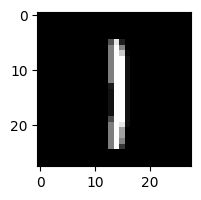

In [21]:
#
# Example
#
plt.figure(figsize=(2,2))
plt.imshow(X_train[random.randint(1,37799)],cmap='gray')
plt.show()

In [22]:
#
# 3.1 GridSearch 
#
#### Find best parameters (its just test because its was so long time and before finish find parameters i closed)
"""
def create_model(filter=32,kernel=3,conv_layer=3,dense_layer=2,units=32,learning_rate=0.01,dropout_rate=0.2):
    model = Sequential()
    model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2)))

    for i in range(conv_layer):
        model.add(Conv2D(filters=filter,kernel_size=(kernel,kernel),activation="relu",padding="same"))
        model.add(MaxPool2D(pool_size=(2,2),padding="same"))

    model.add(Flatten())
    model.add(Dense(32,activation="relu"))

    for j in range(dense_layer):
        model.add(Dense(units,activation="relu"))
        model.add(Dropout(dropout_rate))

    model.add(Dense(10,activation="softmax"))
    model.compile(optimizer=Adam(learning_rate),loss="categorical_crossentropy",metrics=["accuracy"])

    return model 

params = {
    "filter" :[32,64],
    "kernel" :[3,5],
    "conv_layer" :[3,4],
    "dense_layer":[2,3],
    "units":[32,64],
    "learning_rate":[0.001,0.01],
    "dropout_rate":[0.0,0.02],
    "epochs":[20,30]
}

class_ = KerasClassifier(build_fn=create_model,verbose=0,
                         conv_layer=None,
                         dense_layer=None,
                         dropout_rate=None,
                         filter=None,
                         kernel=None,
                         learning_rate=None,
                         units=None
                         )

grid = GridSearchCV(estimator=class_,param_grid=params,cv=3)
grid_result = grid.fit(X_train,y_train)
bestparams = grid_result.best_params_

bestmodel = create_model(filter=bestparams["filter"],
                         kernel=bestparams["kernel"],
                         conv_layer=bestparams["conv_layer"],
                         dense_layer=bestparams["dense_layer"],
                         units=bestparams["units"],
                         learning_rate=bestparams["learning_rate"],
                         dropout_rate=bestparams["dropout"],

                         )


result = bestmodel.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=128,verbose=0)
"""

'\ndef create_model(filter=32,kernel=3,conv_layer=3,dense_layer=2,units=32,learning_rate=0.01,dropout_rate=0.2):\n    model = Sequential()\n    model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation="relu"))\n    model.add(MaxPool2D(pool_size=(2,2)))\n\n    for i in range(conv_layer):\n        model.add(Conv2D(filters=filter,kernel_size=(kernel,kernel),activation="relu",padding="same"))\n        model.add(MaxPool2D(pool_size=(2,2),padding="same"))\n\n    model.add(Flatten())\n    model.add(Dense(32,activation="relu"))\n\n    for j in range(dense_layer):\n        model.add(Dense(units,activation="relu"))\n        model.add(Dropout(dropout_rate))\n\n    model.add(Dense(10,activation="softmax"))\n    model.compile(optimizer=Adam(learning_rate),loss="categorical_crossentropy",metrics=["accuracy"])\n\n    return model \n\nparams = {\n    "filter" :[32,64],\n    "kernel" :[3,5],\n    "conv_layer" :[3,4],\n    "dense_layer":[2,3],\n    "units":[32,64],\n    "learning_r

In [23]:
#
# 3.2 Define the model
#
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation="relu"))
model.add(BatchNormalization())


model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10,activation="softmax"))

c:\Users\Samet\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [24]:
#
# 3.3 Set the optimizer and Compile
#

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
result = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=35,batch_size=128,verbose=1)

Epoch 1/35
296/296 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - accuracy: 0.7049 - loss: 0.9840 - val_accuracy: 0.1155 - val_loss: 8.6571
Epoch 2/35
296/296 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.9613 - loss: 0.1304 - val_accuracy: 0.8860 - val_loss: 0.3716
Epoch 3/35
296/296 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - accuracy: 0.9696 - loss: 0.0982 - val_accuracy: 0.9852 - val_loss: 0.0441
Epoch 4/35
296/296 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.9771 - loss: 0.0754 - val_accuracy: 0.9857 - val_loss: 0.0480
Epoch 5/35
296/296 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.9796 - loss: 0.0664 - val_accuracy: 0.9900 - val_loss: 0.0401
Epoch 6/35
296/296 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - accuracy: 0.9847 - loss: 0.0547 - val_accuracy: 0.9902 - val_loss: 0.0416
Epoch 7/35
296/296 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.9848 - loss: 0.0482 - val_accuracy: 0.9921 - val_loss: 0.0289
Epoch 8/35
296/296 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.9861 - loss: 0.0440 - 

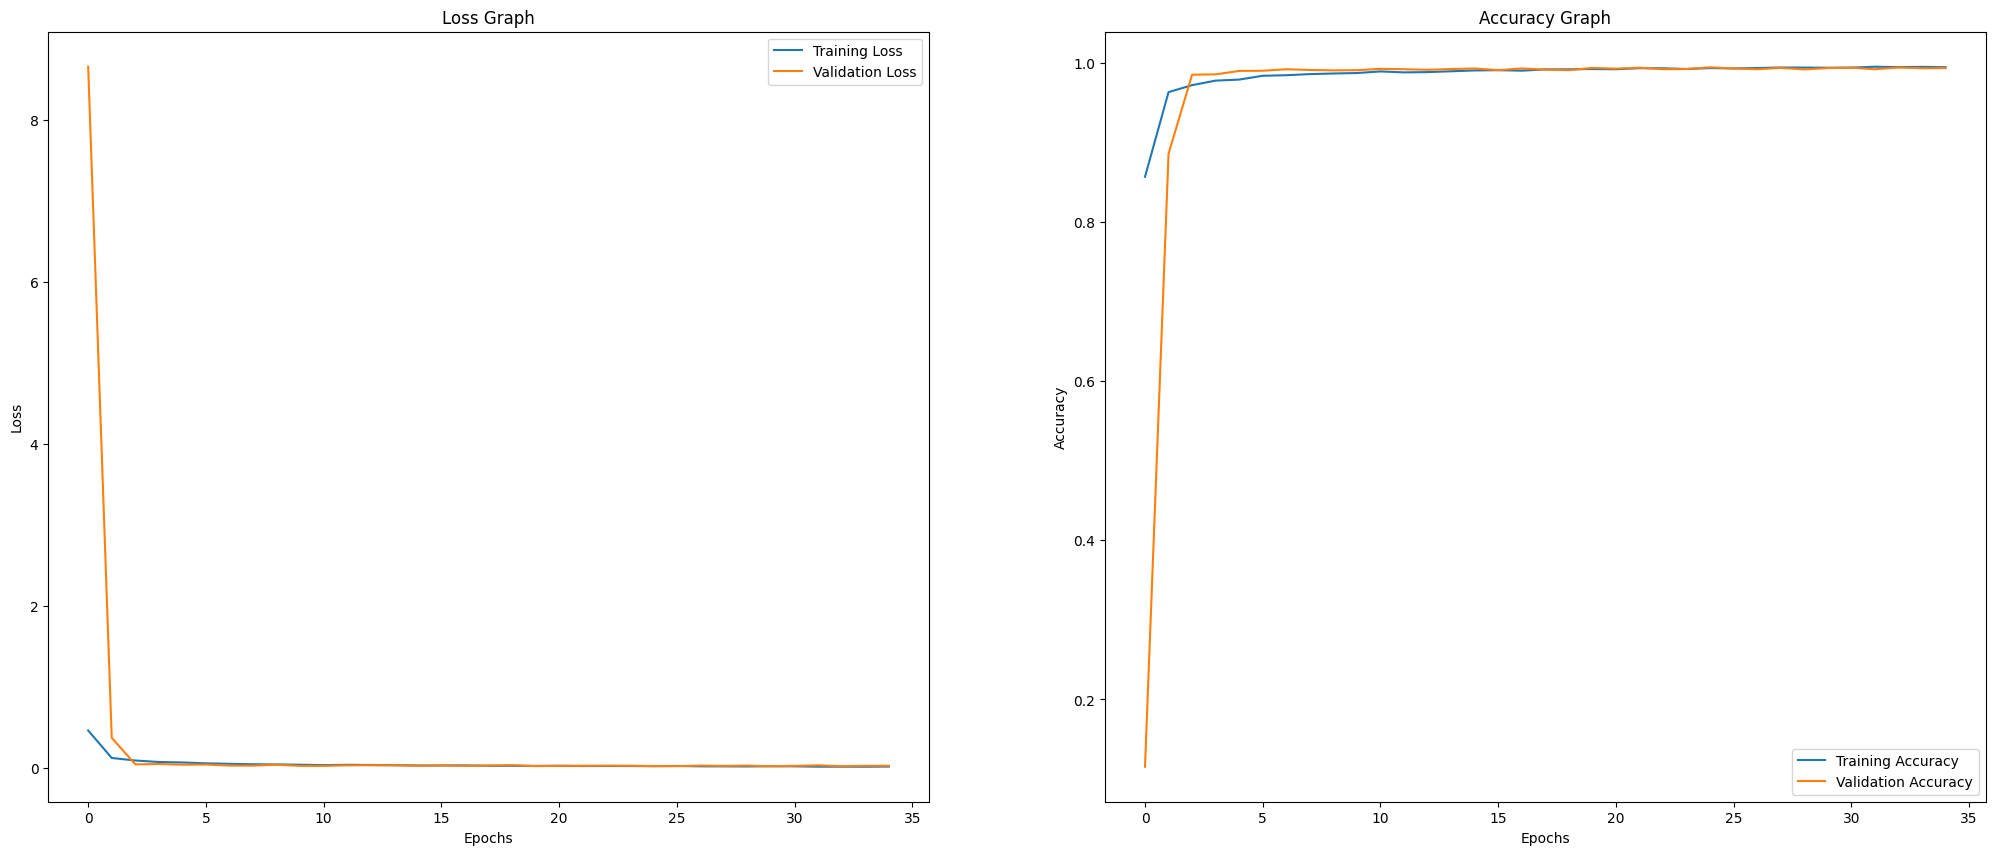

In [27]:
#
# 4.1 Training and validation graph
#

fig,ax = plt.subplots(1,2,figsize=(25,10))

ax[0].plot(result.history["loss"],label="Training Loss")
ax[0].plot(result.history["val_loss"],label="Validation Loss")
ax[0].set_title("Loss Graph")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend()

ax[1].plot(result.history["accuracy"],label="Training Accuracy")
ax[1].plot(result.history["val_accuracy"],label="Validation Accuracy")
ax[1].set_title("Accuracy Graph")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


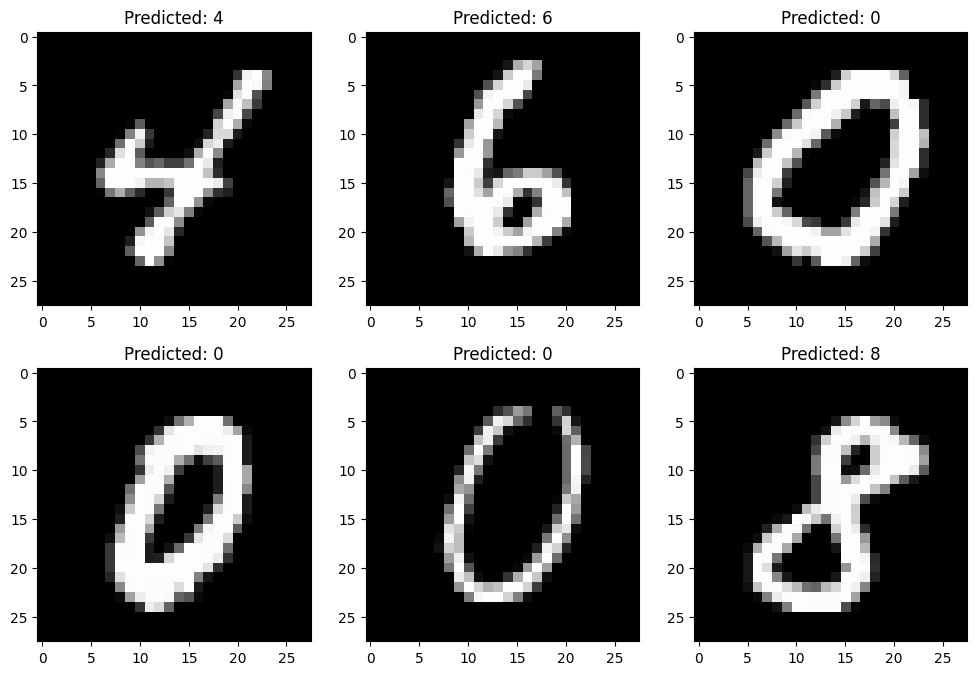

In [57]:
#
# 4.2 Example Prediction
#

r_exp = test_data[np.random.choice(len(test_data),size=6)]
prediction = model.predict(r_exp)


plt.figure(figsize=(12, 8))

for z in range(6):
    plt.subplot(2, 3, z+1)
    plt.imshow(r_exp[z].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {prediction[z].argmax()}")
    
plt.show()



In [ ]:
#
# 5.1 Predict and Submit results
#

test_pred = model.predict(test_data)
output = pd.DataFrame({
    "ImageId" : range(1,28001,1),
    "Label" : test_pred.argmax(axis=1)
    }
)
output.to_csv("submission1.csv",index=False)